In [1]:
import pandas as pd
import numpy as np

iris_data = pd.read_csv('iris_data.csv')
iris_data.head()

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
from sklearn.cluster import estimate_bandwidth

iris_bandwidth = estimate_bandwidth(iris_data)

In [3]:
from sklearn.cluster import MeanShift

analyzer = MeanShift(bandwidth=iris_bandwidth)
analyzer.fit(iris_data)

MeanShift(bandwidth=1.333512511925623, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [4]:
labels = analyzer.labels_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print(f"Number of estimated clusters: {n_clusters}")

Number of estimated clusters: 2


In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

Number of estimated clusters : 3


ValueError: bad input shape (50, 5)

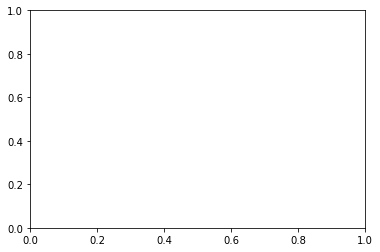

In [16]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn import preprocessing

labels, cluster_centers, n_clusters = mean_shift(iris_data)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')

for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    label_enc =preprocessing.LabelEncoder()
    iris_data[my_members] = label_enc.fit_transform(iris_data[my_members].astype(str))
    
    x, y = iris_data[my_members,0], iris_data[my_members,1]
    #x = x.value
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()